# Linear Discriminant Analysis and Bayes Theorem (19)

In **discriminant analysis** we are going to model the distribution of the classes separately, then use **bayes theorem** to flip things around, and use **Gaussian normal distributions**.

### Bayes Theorem

$$ \Pr(Y = k|X = x) = \dfrac{\Pr(X = x|Y = k) * \Pr(Y = k)}{\Pr(X = x)} $$

* Probability of event Y happening is the product of true positives x false positives / all positives

Written for discriminant analysis:

$$ \Pr(Y = k|X = x) = \dfrac{\pi_{k}f_{k}(x)}{\sum_{l = 1}^{K}\pi_{l}f_{l}(x)} $$

* $f_{k}(x) = \Pr(X = x|Y = k)$ is the **density** for $X$ in class $k$. We will be using normal densities.
* $\pi_{k} = \Pr(Y = k)$ is the marginal **prior** probability for class $k$.
* We are going to plug in the Gaussian density in order to classify to the highest density (setting the decision boundary as the point the two densities cross - imagine two normal distributions that overlap)

### Why discriminant analysis?

* Classes are well-separated. The parameters for log reg are surprisingly unstable, whereas linear discriminant analysis doesn't suffer from this problem.
* If n is small and the distribution of the predictors X are approximately normal, then you'd be better off using discriminant analysis.

# Univariate Linear Discriminant Analysis (20)

The **Gaussian density** has the form:

$$ f_{k}(x) = \dfrac{1}{\sqrt{2\pi\sigma_{k}}}e^{-\frac{1}{2}(\frac{x - \mu_{k}}{\sigma_{k}})^2}
$$

Plugging this in to the Bayes formula results in something complex, but for simplicity's sake...

$$\delta_{k}(x) = x * \frac {\mu_{k}}{\sigma ^ 2} - \frac {\mu_{k}^2}{2\sigma ^ 2} + \log(\pi_{k})
$$

Which results in assigning x to the class with the largest **discriminant score**, which results in a linear function $\delta_{k}(x)$.

If there were 2 classes and $\pi_{1} = \pi_{2} = 0.5$:

$$ x = \dfrac {\mu_{1} + \mu_{2}}{2} $$

**See if you can show this?!**

### Estimating Parameters

$$ \hat{\pi}_{k} = \dfrac{n_{k}}{n} $$
$$ \hat{\mu}_{k} = \dfrac{1}{n_{k}}\sum_{i:y_{i} = k} x_{i} $$

* sample mean

$$ \hat{\sigma}^2 = \dfrac{1}{n - K}\sum_{k = 1} ^ {K}\sum_{y_{i} = k}(x_{i} - \hat{\mu}_{k})^2 $$
$$ = \sum_{k = 1}^{K} \dfrac {n_{k} - 1}{n - K} * \hat{\sigma}_{k}^2 $$

* this is the average weighted variance

where $\hat{\sigma}_{k}^2 = \dfrac{1}{n_{k} - 1} \sum_{i:y_{i} = k} (x_{i} - \hat{\mu}_{k})^2 $ is the variance predictor.

# Multivariate Linear Discriminant Analysis and ROC Curves (21)

$$ \text{Density: } f(x) = \dfrac{1}{(2\pi)^{p/2}\left|\sum\right|^{1/2}}e ^{-\frac{1}{2}(x - \mu)^T \sum ^{-1}(x-\mu)}$$

* Nope

$$ \text{Discriminant function: } 
\delta_{k}(x) = x^T\Sigma^{-1} - \dfrac{1}{2} \mu_{k}^T \Sigma^{-1}\mu_{k} + \log\pi_{k} $$

* The important thing is that this is still a **linear function**. Despite it's complex form, it can be written:

$$\delta_{k}(x) = c_{k0} + c_{k1}x_{1} + c_{k2}x_{2} + ... + c_{kp}x_{p} $$

* Where $c_{k0}$ is made up of $\dfrac{1}{2} \mu_{k}^T \Sigma^{-1}\mu_{k} + \log\pi_{k}$ and the other coefficients are made up of $x^T\Sigma^{-1}$.

Results would look like colored graphs that are separated by many lines. The **bayes decision boundaries** yield the fewest misclassification errors.

### Example in R

In [15]:
?iris

iris {datasets},R Documentation


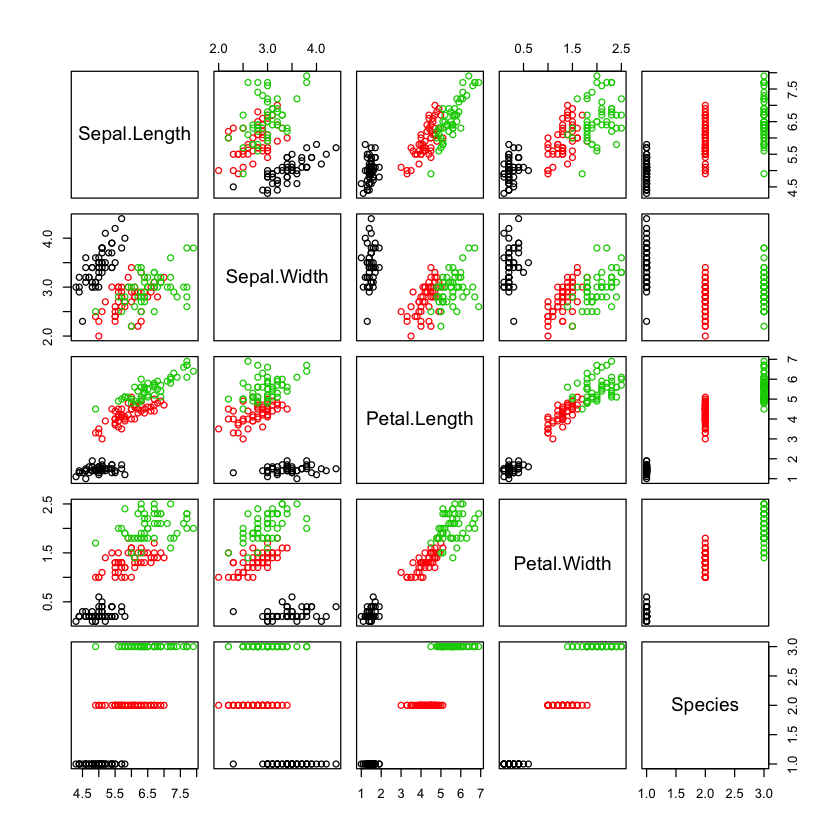

In [14]:
pairs(iris, col = iris$Species)
# See how these flowers are pretty distinct!

Once you have the estimates $\hat{\delta}(x)$ we turn these into probabilties:

$$ \hat{\Pr}(Y = k|X = x) = \dfrac{e^{\hat{\delta}_{k}(x)}}{\sum_{l = 1}^{K} e^{\hat{\delta}_{l}(x)}}$$ 

* i.e. when there are 2 categories, if $\Pr \ge 0.5$ then category = 2.

In a case there's 333 "no"s and 9667 "yes"s and there's only a 2.75% misclassification rate on training data, we may be overfitting as if you always classify yes you'll make 3.33% misclassification rate. In fact, we'll make 252/333 wrong guesses on "yes"s (75.7% error!).

* **False positive rate:** % negative examples that are classified as positive.
* **False negative rate:** % positive examples that are classified as negative.

Therefore we set a variable threshold: $\hat{Pr}(\text{Default = } = \text{Yes|Balance,Student}) \ge \text{threshold} $

* we want to find the threshold where false positive = false negative. Will look like bias-variance tradeoff.

The **ROC plot** displays both simultaneously.

# Quadratic Discriminant Analysis and Naive Bayes (22)

* With Gaussians but different $\sum_{k}$ values in each class, we get **quadratic discriminant analysis**.
* With $f_{k}(x) = \prod_{j = 1} ^ {p} f_{jk}(x_{j})$ (conditional independence model) in each class we get **naive Bayes**. For Gaussian this means the $\sum_{k}$ are diagonal.
    * Useful for 4k+ # of features.
    
### Quadratic Discriminant Analysis

$$ \delta_{k}(x) = -\dfrac{1}{2}(x - \mu_{k})^T\Sigma_{k}^{-1}(x - \mu_{k}) + \log\pi_{k} - \dfrac{1}{2} \log \left|\Sigma_{k}\right| $$

* This will give you a quadratic decision boundary, not a linear one.

### Naive Bayes

When p is lage, multivariate methods like QDA and LDA will break down.

Gaussian naive Bayes assumes each $\Sigma_{k}$ is diagonal:

$$\delta_{k}(x) \text{ diag } \log\bigg[\pi_{k} \prod_{j = 1} ^ {p} f_{kj}(x_{j}) \bigg]$$

$$ = -\dfrac{1}{2} \sum_{j = 1}^{p} \bigg[\dfrac{(x_{j} - \mu_{kj})^2}{\sigma_{kj}^2} +\log\sigma_{kj}^2 \bigg] + \log \pi_{k}$$

* This is made up of the determinant term (left) and the prior term (right)
* can use for **mixed** feature vectors (qualitative, qualitative)
    * qualitative replaces Gaussian distributions with histograms
    
### Logistic Regression vs. LDA

While logreg and LDA have the same form, 

* logreg uses conditional likelyhood based on $\Pr(Y|X)$ aka ** discriminative learning**
* LDA uses full likelihood based on $\Pr(X,Y)$ aka **generative learning**
* Despite these differences in practice the results are very similar

# R-Lab, Linear and Discriminant Analysis (23)

In [22]:
require(ISLR)
require(MASS)

Loading required package: MASS


In [29]:
lda.fit = lda(Direction~Lag1+Lag2, data = Smarket, subset = Year <2005)
lda.fit
# linear discriminant analysis
# prior probabilities is % of ups and downs
# group means has a little bit of a difference

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

In [27]:
?lda

lda {MASS},R Documentation
formula,"A formula of the form groups ~ x1 + x2 + ... That is, the response is the grouping factor and the right hand side specifies the (non-factor) discriminators."
data,Data frame from which variables specified in formula are preferentially to be taken.
x,(required if no formula is given as the principal argument.) a matrix or data frame or Matrix containing the explanatory variables.
grouping,(required if no formula principal argument is given.) a factor specifying the class for each observation.
prior,"the prior probabilities of class membership. If unspecified, the class proportions for the training set are used. If present, the probabilities should be specified in the order of the factor levels."
tol,A tolerance to decide if a matrix is singular; it will reject variables and linear combinations of unit-variance variables whose variance is less than tol^2.
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
method,"""moment"" for standard estimators of the mean and variance, ""mle"" for MLEs, ""mve"" to use cov.mve, or ""t"" for robust estimates based on a t distribution."
CV,"If true, returns results (classes and posterior probabilities) for leave-one-out cross-validation. Note that if the prior is estimated, the proportions in the whole dataset are used."


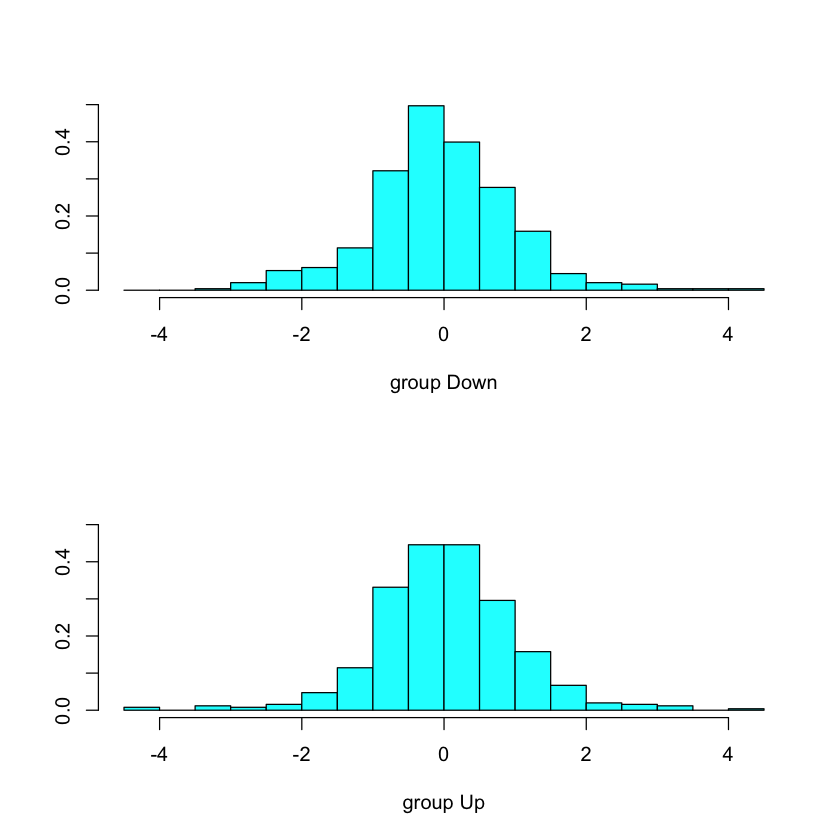

In [30]:
plot(lda.fit)
# will plot separately for the upgroup and downgroup

In [33]:
Smarket.2005 = subset(Smarket, Year == 2005)
# makes a subset
lda.pred = predict(lda.fit, Smarket.2005)
# makes a prediction using lda.fit formula on this new subset
lda.pred[1:5,]

ERROR: Error in lda.pred[1:5, ]: incorrect number of dimensions


In [34]:
# if this isn't a matrix, what is this?
class(lda.pred)

[1] "list"

In [36]:
# as a list, let's look at it through a data frame
data.frame(lda.pred)[1:5,]

,class,posterior.Down,posterior.Up,LD1
999,Up,0.4901792,0.5098208,0.08293096
1000,Up,0.4792185,0.5207815,0.591141
1001,Up,0.4668185,0.5331815,1.167231
1002,Up,0.4740011,0.5259989,0.8333502
1003,Up,0.4927877,0.5072123,-0.03792892


In [37]:
table(lda.pred$class, Smarket.2005$Direction)

      
       Down  Up
  Down   35  35
  Up     76 106

In [38]:
mean(lda.pred$class == Smarket.2005$Direction)
# around the same level of before...

[1] 0.5595238

# R-Labs, K-Nearest Neighbors (24)

In [40]:
library(class)
?knn
# a little different from before,
# knn(train, test, cl, ...)
# asks for the training data, the test data, 
# and factor of true classifications of training set

knn {class},R Documentation
train,matrix or data frame of training set cases.
test,matrix or data frame of test set cases. A vector will be interpreted as a row vector for a single case.
cl,factor of true classifications of training set
k,number of neighbours considered.
l,"minimum vote for definite decision, otherwise doubt. (More precisely, less than k-l dissenting votes are allowed, even if k is increased by ties.)"
prob,"If this is true, the proportion of the votes for the winning class are returned as attribute prob."
use.all,"controls handling of ties. If true, all distances equal to the kth largest are included. If false, a random selection of distances equal to the kth is chosen to use exactly k neighbours."


In [41]:
attach(Smarket)
ls()

[1] "lda.fit"      "lda.pred"     "Smarket.2005"

In [44]:
objects(2)
# Smarket is in location 2

[1] "Direction" "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Today"     "Volume"    "Year"

In [46]:
Xlag = cbind(Lag1, Lag2)
#matrix of 2 columns
Xlag[1:5,]

Lag1,Lag2
0.381,-0.192
0.959,0.381
1.032,0.959
-0.623,1.032
0.614,-0.623


In [47]:
train = Year < 2005

In [50]:
knn.pred = knn(Xlag[train, ], Xlag[!train, ], Direction[train], k = 1)
# makes knn prediction
# k = 1 means 1 nearest neighbor. Perhaps not the best.
table(knn.pred, Direction[!train])

        
knn.pred Down Up
    Down   43 58
    Up     68 83

In [51]:
mean(knn.pred == Direction[!train])

[1] 0.5

In [85]:
knn.pred = knn(Xlag[train, ], Xlag[!train, ], Direction[train], k = 2)
mean(knn.pred == Direction[!train])

[1] 0.5436508

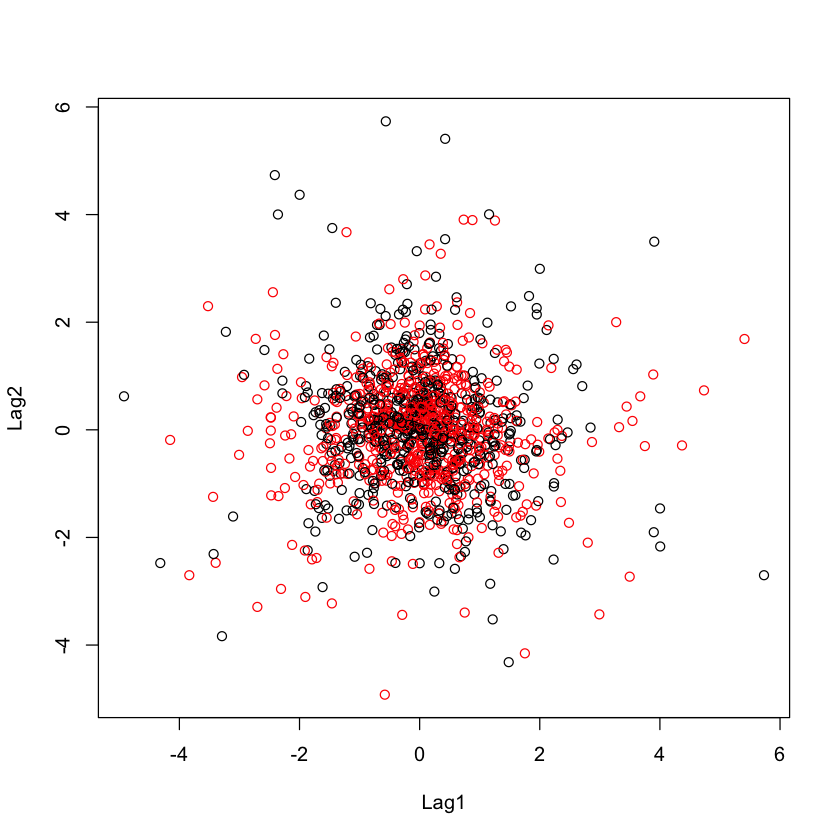

In [86]:
plot(Xlag, col = knn.pred)